# GAN overriding `Model.train_step`

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2019/04/29<br>
**Last modified:** 2020/04/29<br>
**Description:** A simple DCGAN trained using `fit()` by overriding `train_step`.

## Setup

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as mlp
import pandas as pd



In [2]:
import copy
import numpy as np
import pandas as pd
import csv


class Item:
    properties = []

    def __init__(self, proplist):
        self.properties = proplist

    def developProps(self):
        self.index = int(self.properties[0][1])

        self.voxelPos = []
        cut = self.properties[3][1].find(" ")
        i = 0
        self.voxelPos.append(int(self.properties[3][1][i:cut]))
        i = cut
        cut = self.properties[3][1].find(" ", cut + 1)
        self.voxelPos.append(int(self.properties[3][1][i:cut]))
        self.voxelPos.append(int(self.properties[3][1][cut+1:]))

        self.angles = []
        cut = self.properties[5][1].find(" ")
        i = 0
        self.angles.append(int(self.properties[5][1][i:cut]))
        i = cut
        cut = self.properties[5][1].find(" ", cut + 1)
        self.angles.append(int(self.properties[5][1][i:cut]))
        self.angles.append(int(self.properties[5][1][cut+1:]))
                
    
    def printprops(self):
        print(self.properties)
        print(self.voxelPos)
        print(self.angles)

class Connection:

    def __init__(self, proplist):
        self.properties = proplist
    
    def printprops(self):
        print(self.properties)

class Voxel:
    def __init__(self, solid, portal0, portal1, portal2):
        self.solid = solid
        self.portal0 = portal0
        self.portal1 = portal1
        self.portal2 = portal2
        self.itemList = []
        self.oneHotItem = []
    
    def setSolid(self, solid):
        self.solid = solid
    
    def setPortal0(self, portal0):
        self.portal0 = portal0

    def setPortal1(self, portal1):
        self.portal1 = portal1

    def setPortal2(self, portal2):
        self.portal2 = portal2
    
    def addItem(self,newItem):
        self.itemList.append(newItem)

    def printVoxel(self):
        print(self.solid)
    
    def enterVoxel(self):
        ret = [self.solid, self.portal0, self.portal1, self.portal2] + self.oneHotItem
        return ret
    
    def makeOneHot(self):
        self.oneHotItem = [1,0,0,0,0,0]
        for i in self.itemList:
            if(i.properties[1][1] == "ITEM_ENTRY_DOOR"):
                self.oneHotItem = [0,1,0,0,0,0]
            elif(i.properties[1][1] == "ITEM_EXIT_DOOR"):
                self.oneHotItem = [0,0,1,0,0,0]
            elif(i.properties[1][1] == "ITEM_CUBE"):
                self.oneHotItem = [0,0,0,1,0,0]
            elif(i.properties[1][1] == "ITEM_DROPPER_CUBE"):
                self.oneHotItem = [0,0,0,0,1,0]
            elif(i.properties[1][1] == "ITEM_BUTTON_FLOOR"):
                self.oneHotItem = [0,0,0,0,0,1]
    
                

    


class Level:
    def __init__(self):
        self.voxelArray = []
        self.size = []
        self.itemArray = []
        self.connectionArray =[]
        self.limits = 10
    
    def printLevel(self):
        for i in range(0,15):  
            for j in range(0,15):
                for k in range(0,15):
                    Z.voxelArray[i][j][k].printVoxel()

    def LevelRead(self,name):
        level = open(name, 'r+b')
        x = 0
        y = 0
        z = 0


        for line in level:
            if(str(line).find("ChamberSize") != -1):
                tempLine = line
                letter = tempLine[17:18]
                i = 17
                while(letter != b" "):
                    x = x*10 + int(letter.decode("utf-8"))
                    i = i + 1
                    letter = tempLine[i:i+1]
                i = i + 1
                letter = tempLine[i:i+1]
                while(letter != b" "):
                    y = y*10 + int(letter.decode("utf-8"))
                    i = i + 1
                    letter = tempLine[i:i+1]
                i = i + 1
                letter = tempLine[i:i+1]
                while(letter != b'"'):
                    z = z*10 + int(letter.decode("utf-8"))
                    i = i + 1
                    letter = tempLine[i:i+1]
                break

        #print(x)
        #print(y)
        #print(z)
        self.size = [x,y,z]
        X = []
        Y = []
        Z = []
        for i in range(0,self.limits):
            for j in range(0,self.limits):
                for k in range(0,self.limits):
                    X.append(Voxel(1,1,1,1))
                Y.append(X)
                X = []
            Z.append(Y)
            Y = []
        
        #print(np.shape(Z))
        
        """for line in level:
            
            if((str(line).find("Solid") != -1)):
                for line in level:
                    tempLine = line
                    print(tempLine)
                    if(str(tempLine).find("f") != -1):
                        i = 12
                        #print(i)
                        letter = tempLine[i:i+1]
                        while(letter != b'"'):
                            print(letter)
                            X.append(Voxel(int(letter.decode("utf-8")),1,1,1))
                            i = i + 1
                            letter = tempLine[i:i+1]
                        #print("Length of X" + str(len(X)))
                        Y.append(X)
                        X = []
                    elif(str(tempLine).find("}") != -1):
                        #print("Length of Y" + str(len(Y)))
                        Z.append(Y)
                        Y = []
                    elif(str(tempLine).find("Portal0") != -1):
                        #print(len(Z))
                        break"""
                
        xIter = 0
        yIter = 0
        zIter = 0
        #solid
        for line in level:
            tempLine = line
            #print(tempLine)
            if(str(tempLine).find("f") != -1):
                i = 12
                #print(i)
                letter = tempLine[i:i+1]
                while(letter != b'"'):
                    #print(letter)
                    Z[zIter][yIter][xIter].setSolid(int(letter.decode("utf-8")))
                    xIter = xIter + 1
                    i = i + 1
                    letter = tempLine[i:i+1]
                #print("Length of X" + str(len(X)))
                yIter = yIter + 1
                xIter = 0
            elif(str(tempLine).find("}") != -1):
                #print("Length of Y" + str(len(Y)))
                zIter = zIter + 1
                yIter = 0
            elif(str(tempLine).find("Portal0") != -1):
                #print(len(Z))
                break

        xIter = 0
        yIter = 0
        zIter = 0
        #portal0
        for line in level:
            tempLine = line
            #print(tempLine)
            if(str(tempLine).find("f") != -1):
                i = 12
                #print(i)
                letter = tempLine[i:i+1]
                while(letter != b'"'):
                    #print(letter)
                    Z[zIter][yIter][xIter].setPortal0(int(letter.decode("utf-8")))
                    xIter = xIter + 1
                    i = i + 1
                    letter = tempLine[i:i+1]
                #print("Length of X" + str(len(X)))
                yIter = yIter + 1
                xIter = 0
            elif(str(tempLine).find("}") != -1):
                #print("Length of Y" + str(len(Y)))
                zIter = zIter + 1
                yIter = 0
            elif(str(tempLine).find("Portal1") != -1):
                #print(len(Z))
                break
        
        xIter = 0
        yIter = 0
        zIter = 0
        #portal1
        for line in level:
            tempLine = line
            #print(tempLine)
            if(str(tempLine).find("f") != -1):
                i = 12
                #print(i)
                letter = tempLine[i:i+1]
                while(letter != b'"'):
                    #print(letter)
                    Z[zIter][yIter][xIter].setPortal1(int(letter.decode("utf-8")))
                    xIter = xIter + 1
                    i = i + 1
                    letter = tempLine[i:i+1]
                #print("Length of X" + str(len(X)))
                yIter = yIter + 1
                xIter = 0
            elif(str(tempLine).find("}") != -1):
                #print("Length of Y" + str(len(Y)))
                zIter = zIter + 1
                yIter = 0
            elif(str(tempLine).find("Portal2") != -1):
                #print(len(Z))
                break

        xIter = 0
        yIter = 0
        zIter = 0
        #portal2
        for line in level:
            tempLine = line
            #print(tempLine)
            if(str(tempLine).find("f") != -1):
                i = 12
                #print(i)
                letter = tempLine[i:i+1]
                while(letter != b'"'):
                    #print(letter)
                    Z[zIter][yIter][xIter].setPortal2(int(letter.decode("utf-8")))
                    xIter = xIter + 1
                    i = i + 1
                    letter = tempLine[i:i+1]
                #print("Length of X" + str(len(X)))
                yIter = yIter + 1
                xIter = 0
            elif(str(tempLine).find("}") != -1):
                #print("Length of Y" + str(len(Y)))
                zIter = zIter + 1
                yIter = 0
            elif(str(tempLine).find("Items") != -1):
                #print(len(Z))
                break
        
        #print(line)
        self.voxelArray = copy.deepcopy(Z)

        itemList = []
        connectionList = []

        itemPropList = []
        prop = ""
        value = ""
        propTupple = []

                #iterating over all the lines
        
        for line in level:
            #print(line)
            #print("hey")
            #clearing property and value strings at the start of each line
            prop = ""
            value = ""

            #check if the string contains "Item" and not "Items"
            if((str(line).find("Item") != -1) and (str(line).find("Items") == -1)):
                
                itemPropList = []
                for line in level:
                    tempLine = line
                    prop = ""
                    value = ""
                    propTupple = []
                    i = 0
                    #if line contains "{" do nothing
                    if(str(tempLine).find("{")!= -1):
                        pass
                        #print("do nothing")
                    elif(str(tempLine).find("}")!= -1):
                        if(len(itemPropList) > 0):
                            newItem = Item(itemPropList)
                            newItem.developProps()
                            """print(len(self.voxelArray))
                            print(len(self.voxelArray[0]))
                            print(len(self.voxelArray[0][0]))
                            print(len(newItem.voxelPos))"""
                            #print(newItem.voxelPos)
                            self.voxelArray[newItem.voxelPos[2]][newItem.voxelPos[1]][newItem.voxelPos[0]].itemList.append(newItem)
                            itemList.append(newItem)
                            itemPropList = []
                            break
                    else:

                        #skipping the 3 tabs and the inverted comma
                        letter = tempLine[4:5]
                        i = 4
                        #recording the string uptill the next inverted comma
                        while(letter != b'"'):
                            prop = "".join([prop, letter.decode("utf-8")])
                            i = i + 1
                            letter = tempLine[i:i+1]
                        
                        #skipping the 2 tabs uptill the next inverted comma
                        i = i + 4
                        letter = tempLine[i:i+1]

                        #recording the string uptill the next inverted comma
                        while(letter != b'"'):
                            
                            value = "".join([value, letter.decode("utf-8")])
                            i = i+1
                            letter = tempLine[i:i+1]
                        
                        

                        
                        #print(prop)
                        #print(value)
                        propTupple.append(prop)
                        propTupple.append(value)
                
                #adding property to the current list
                        itemPropList.append(propTupple)

                self.itemArray = copy.deepcopy(itemList)

                        

                #restting the property tupple
            if((str(line).find("Connection") != -1) and (str(line).find("Connections") == -1)):
                
                connectionPropList = []
                for line in level:
                    tempLine = line
                    prop = ""
                    value = ""
                    propTupple = []
                    i = 0
                    #if line contains "{" do nothing
                    if(str(tempLine).find("{")!= -1):
                        pass
                        #print("do nothing")
                    elif(str(tempLine).find("}")!= -1):
                        if(len(connectionPropList) > 0):
                            newConnection = Connection(connectionPropList)
                            connectionList.append(newConnection)
                            connectionPropList = []
                            break
                    else:

                        #skipping the 3 tabs and the inverted comma
                        letter = tempLine[4:5]
                        i = 4
                        #recording the string uptill the next inverted comma
                        while(letter != b'"'):
                            prop = "".join([prop, letter.decode("utf-8")])
                            i = i + 1
                            letter = tempLine[i:i+1]
                        
                        #skipping the 2 tabs uptill the next inverted comma
                        i = i + 4
                        letter = tempLine[i:i+1]

                        #recording the string uptill the next inverted comma
                        while(letter != b'"'):
                            
                            value = "".join([value, letter.decode("utf-8")])
                            i = i+1
                            letter = tempLine[i:i+1]
                        
                        

                        
                        #print(prop)
                        #print(value)
                        propTupple.append(prop)
                        propTupple.append(value)
                
                #adding property to the current list
                        connectionPropList.append(propTupple)
                self.connectionArray = copy.deepcopy(connectionList)

        #print(len(itemList))
        #print(len(connectionList))
        #itemList[2].printprops()
    
        
    def developOneHot(self):
        for i in range(0,self.limits):
            for j in range(0,self.limits):
                for k in range(0,self.limits):
                    self.voxelArray[i][j][k].makeOneHot()

    def makeCSVarray(self):
        Z = []
        Y = []
        X = []
        for i in range(0,self.limits):
            for j in range(0,self.limits):
                for k in range(0,self.limits):
                    X.append(self.voxelArray[i][j][k].enterVoxel())
                Y.append(X)
                X = []
            Z.append(Y)
            Y = []
        return Z
    
        

data = []

for k in range(0,38):
    print(k)
    name = "level (" +str(k + 1) + ").p2c"
    newLevel = Level()
    newLevel.LevelRead(name)
    newLevel.developOneHot()
    Z = newLevel.makeCSVarray()
    data.append(Z)
    data.append(np.rot90(Z,1,(1,2)))
    data.append(np.rot90(Z,2,(1,2)))
    data.append(np.rot90(Z,3,(1,2)))
    data.append(np.flip(Z,1))
    data.append(np.rot90(np.flip(Z,1),1,(1,2)))
    data.append(np.rot90(np.flip(Z,1),2,(1,2)))
    data.append(np.rot90(np.flip(Z,1),3,(1,2)))
    del newLevel

print(np.shape(data))



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
(304, 10, 10, 10, 10)


## Prepare MNIST data

In [39]:
# We use both the training & test MNIST digits.
batch_size = 50

"""(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_digits = all_digits.astype("float32") / 255"""
#all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
#data = pd.read_csv('Data.csv')
#print(data)
#Z = np.array(data)
#print(np.shape(Z))
dataN = np.array(data)
dataN = dataN.astype("float32")






In [40]:
dataset = tf.data.Dataset.from_tensor_slices(dataN)
dataset = dataset.shuffle(buffer_size=10).batch(batch_size)
print(dataset)

<BatchDataset shapes: (None, 10, 10, 10, 10), types: tf.float32>


## Create the discriminator

It maps 28x28 digits to a binary classification score.

In [ ]:
"""discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

discriminator.summary()"""

'discriminator = keras.Sequential(\n    [\n        keras.Input(shape=(28, 28, 1)),\n        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.GlobalMaxPooling2D(),\n        layers.Dense(1),\n    ],\n    name="discriminator",\n)\n\ndiscriminator.summary()'

In [41]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(10, 10, 10, 10)), 
        layers.Conv3D(16, (3, 3, 3), strides=(1, 1, 1), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv3D(32, (3, 3, 3), strides=(2, 2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv3D(64, (3, 3, 3), strides=(2, 2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.GlobalMaxPooling3D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 10, 10, 10, 16)    4336      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 10, 10, 10, 16)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 5, 5, 5, 32)       13856     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 5, 5, 5, 32)       0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 3, 3, 3, 64)       55360     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 3, 3, 3, 64)       0         
_________________________________________________________________
global_max_pooling3d_1 (Glob (None, 64)              

## Create the generator

It mirrors the discriminator, replacing `Conv2D` layers with `Conv2DTranspose` layers.

In [42]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        # We want to generate 128 coefficients to reshape into a 7x7x128 map
        layers.Dense(3* 3 * 3 * 64),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((3, 3, 3, 64)),
        layers.Conv3DTranspose(32, (4, 4, 4), strides=(2, 2, 2), padding="same"),
        layers.Cropping3D(cropping = ((0,1),(0,1),(0,1))),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv3DTranspose(16, (4, 4, 4), strides=(2, 2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv3DTranspose(10, (4, 4, 4), strides=(1, 1, 1), padding="same"),
    ],
    name="generator",
)

generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1728)              222912    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 1728)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 3, 3, 3, 64)       0         
_________________________________________________________________
conv3d_transpose_12 (Conv3DT (None, 6, 6, 6, 32)       131104    
_________________________________________________________________
cropping3d_2 (Cropping3D)    (None, 5, 5, 5, 32)       0         
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 5, 5, 5, 32)       0         
_________________________________________________________________
conv3d_transpose_13 (Conv3DT (None, 10, 10, 10, 16)    32

## Override `train_step`

In [43]:
def makelevel(levelarray):
  for i in range(0,10):
    for j in range(0,10):
      for k in range(0,10):
        for l in range(0,4):
          if(levelarray[i][j][k][l] >= 0.5):
             levelarray[i][j][k][l] = 1.0
          else:
            levelarray[i][j][k][l] = 0.0
        maxind = np.argmax(levelarray[i][j][k][4:10])+4
        print(maxind)
        for l in range(4,10):
          if(l == maxind):
            levelarray[i][j][k][l] = 1.0
          else:
            levelarray[i][j][k][l] = 0.0
  return levelarray
          

In [44]:

class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)


        # Combine them with real images
        
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        return {"d_loss": d_loss, "g_loss": g_loss}


## Create a callback that periodically saves generated images

In [45]:

class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images.numpy()
        generated_images = np.reshape(generated_images,(-1,10*10*10,10))
        for i in range(self.num_img):
            df = pd.DataFrame(generated_images[i])
            df.to_csv("Data" + str(epoch)+str(i)+".csv", index = False)

## Train the end-to-end model

In [46]:
epochs = 50
gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
    
)

history = gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=1, latent_dim=latent_dim)]
)

Epoch 1/50
7/7 [==============================] - 5s 682ms/step - d_loss: 0.5306 - g_loss: 0.6619
Epoch 2/50
7/7 [==============================] - 5s 673ms/step - d_loss: 0.5518 - g_loss: 0.5201
Epoch 3/50
7/7 [==============================] - 5s 672ms/step - d_loss: 0.5151 - g_loss: 0.7645
Epoch 4/50
7/7 [==============================] - 5s 670ms/step - d_loss: 0.4150 - g_loss: 1.1812
Epoch 5/50
7/7 [==============================] - 5s 676ms/step - d_loss: 0.6220 - g_loss: 0.6150
Epoch 6/50
7/7 [==============================] - 5s 672ms/step - d_loss: 0.5169 - g_loss: 0.9559
Epoch 7/50
7/7 [==============================] - 5s 677ms/step - d_loss: 0.2678 - g_loss: 1.3678
Epoch 8/50
7/7 [==============================] - 5s 672ms/step - d_loss: 0.3210 - g_loss: 0.9998
Epoch 9/50
7/7 [==============================] - 5s 679ms/step - d_loss: 0.4214 - g_loss: 0.6757
Epoch 10/50
7/7 [==============================] - 5s 677ms/step - d_loss: 0.4216 - g_loss: 0.7272
Epoch 11/50
7/7 [==

Display the last generated images:

In [ ]:
from IPython.display import Image, display

display(Image("generated_img_0_29.png"))
display(Image("generated_img_1_29.png"))
display(Image("generated_img_2_29.png"))

In [50]:
dataN = pd.read_csv('Data390.csv')

print(dataN)

            0         1         2  ...         7         8         9
0    0.245842  0.300074  0.318715  ...  0.044053  0.154267  0.081534
1    0.318418  0.297599  0.197076  ...  0.044738  0.194486  0.139605
2    0.295285  0.261154  0.247458  ...  0.111277  0.246358  0.155012
3    0.311800  0.215596  0.178139  ...  0.068990  0.245509  0.087855
4    0.294532  0.320489  0.194850  ...  0.110331  0.243785  0.129305
..        ...       ...       ...  ...       ...       ...       ...
995  0.367233  0.375169 -0.087441  ...  0.412348  0.459979  0.077910
996  0.499175  0.262587  0.007857  ...  0.363846  0.405592  0.083995
997  0.376846  0.447463 -0.051831  ...  0.398915  0.416886  0.098570
998  0.647582  0.532102  0.153664  ...  0.439212  0.551390  0.167340
999  0.440778  0.499609  0.069000  ...  0.395202  0.442006  0.090233

[1000 rows x 10 columns]


In [51]:
Z = np.array(dataN)
Z =  np.reshape(Z,(10,10,10,10))
finalevel = makelevel(Z)


8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
5
8
8
8
8
8
8
8
8
8
7
8
8
8
7
8
8
8
8
8
7
8
7
8
4
8
7
7
7
8
7
8
8
8
8
8
8
8
8
8
5
8
8
8
4
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
8
7
8
7
8
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
8
7
8
7
7
7
8
8
7
8
8
8
7
8
7
8
7
8
8
8
8
8
8
8
8
8
8
8
7
8
8
7
7
7
7
7
7
8
7
7
7
7
7
7
7
7
8
8
8
8
8
8
7
8
7
8
7
8
8
8
8
8
8
8
8
8
8
8
7
8
8
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
7
8
8
8
8
8
5
8
7
8
8
8
7
8
8
8
8
8
8
8
4
8
8
8
8
8
7
8
7
8
4
4
7
8
8
7
8
8
8
7
4
8
8
8
8
8
8
8
7
8
4
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
4
8
8
8
8
8
8
8
8
8
8
8
8
8
8
5
8
8
8
8
8
8
8
8
8
8
5
7
5
8
7
7
5
7
8
8
5
8
5
5
7
7
7
8
7
8
7
8
8
8
7
8
7
8
8
5
7
8
7
7
7
7
7
7
7
7
8
7
7
8
7
7
7
8
8
8
5
8
5
5
7
7
5
8
5
8
8
8
8
8
8
8
8
8
8
5
7
8
8
5
5
8
5
5
8
8
8
8
8
8
8
8
8
8
8
8
7
8
7
8
8
8
8
8
8
8
5
5
5
5
5
5
5
5
8
8
5
8
7
8
7
8
7
8
8
8
5
5
5
5
4
6
5
5
8
8
7
8
7
4
4
4
6
4
7
8
5
5
5
5
9
5
5
5
8
8
5
8
8
8
4
8
7
8
8
8
8
8
8
5
8
8
5
5
8
8
7
8
7
8
4
5
7
8
7
8


In [53]:
finalevel = np.reshape(finalevel,(10*10*10,10))
df = pd.DataFrame(finalevel)
df.to_csv("finalevel.csv", index = False)

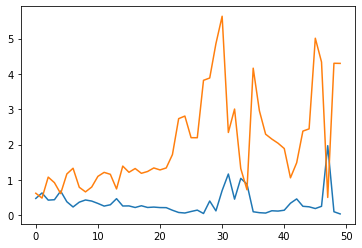

In [54]:
mlp.plot(history.history['d_loss'])
mlp.plot(history.history['g_loss'])

In [35]:
print(history.history.keys())

dict_keys(['d_loss', 'g_loss'])
